In [1]:
# TODO: Add import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from win32comext.shell.shellcon import PRINTACTION_OPEN

In [6]:
# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('data.csv')
X = train_data[['Var_X']]
y = train_data[['Var_Y']]

In [7]:
train_data.head()

,Var_X,Var_Y
0,-0.33532,6.66854
1,0.02160,3.86398
2,-1.19438,5.16161
3,-0.65046,8.43823
4,-0.28001,5.57201


In [22]:
print(X.shape)
X

(20, 1)


,Var_X
0,-0.33532
1,0.02160
2,-1.19438
3,-0.65046
4,-0.28001
5,1.93258
6,1.22620
7,0.74727
8,3.32853
9,2.87457


In [23]:
print(y.shape)
y

(20, 1)


,Var_Y
0,6.66854
1,3.86398
2,5.16161
3,8.43823
4,5.57201
5,-11.13270
6,-5.31226
7,-4.63725
8,3.80650
9,-6.06084


In [27]:
# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree=4)
X_poly = poly_feat.fit_transform(X)

In [28]:
X_poly

array([[ 1.00000000e+00, -3.35320000e-01,  1.12439502e-01,
        -3.77032139e-02,  1.26426417e-02],
       [ 1.00000000e+00,  2.16000000e-02,  4.66560000e-04,
         1.00776960e-05,  2.17678234e-07],
       [ 1.00000000e+00, -1.19438000e+00,  1.42654358e+00,
        -1.70383513e+00,  2.03502660e+00],
       [ 1.00000000e+00, -6.50460000e-01,  4.23098212e-01,
        -2.75208463e-01,  1.79012097e-01],
       [ 1.00000000e+00, -2.80010000e-01,  7.84056001e-02,
        -2.19543521e-02,  6.14743813e-03],
       [ 1.00000000e+00,  1.93258000e+00,  3.73486546e+00,
         7.21792628e+00,  1.39492200e+01],
       [ 1.00000000e+00,  1.22620000e+00,  1.50356644e+00,
         1.84367317e+00,  2.26071204e+00],
       [ 1.00000000e+00,  7.47270000e-01,  5.58412453e-01,
         4.17284874e-01,  3.11824468e-01],
       [ 1.00000000e+00,  3.32853000e+00,  1.10791120e+01,
         3.68771565e+01,  1.22746722e+02],
       [ 1.00000000e+00,  2.87457000e+00,  8.26315268e+00,
         2.37530108e+01

In [30]:
# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

print(f"Coefficients: {poly_model.coef_}")
print(f"Intercept: {poly_model.intercept_}")

Coefficients: [[ 3.37563501 -6.28126025 -2.3787942   0.55307182  0.22699807]]
Intercept: 0.0


D:\miniconda3\envs\ud-ml\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


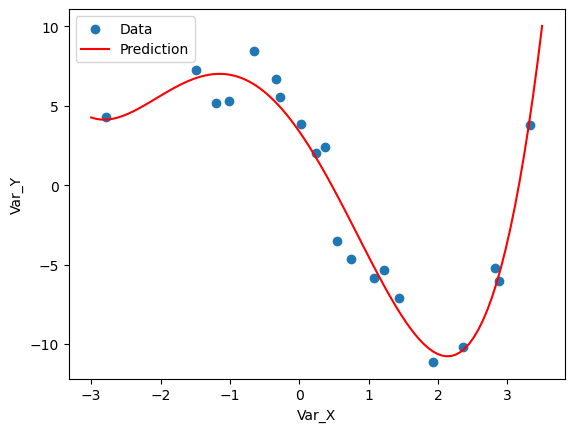

In [31]:
# Plot the data and polynomial regression model
X_new = np.linspace(-3, 3.5, 100).reshape(100, 1)
X_new_poly = poly_feat.transform(X_new)
y_new = poly_model.predict(X_new_poly)

plt.scatter(X, y, label="Data")
plt.plot(X_new, y_new, "r-", label="Prediction")
plt.xlabel("Var_X")
plt.ylabel("Var_Y")
plt.legend(loc="best")
plt.show()